In [54]:
import numpy as np
from skimage import io, img_as_float

x = [[170, 240, 10, 80, 150],
     [230, 50, 70, 140, 160],
     [40, 60, 130, 200, 220],
     [100, 200, 190, 210, 30],
     [110, 180, 250, 20, 90]]
x = np.array(x, dtype=np.uint8)

In [55]:
#線性濾波器
#ones:產生一個3*3的shape 裡面都是1
#再把裡面每個數字除以9
mask = np.ones((3,3)) /9
#print(mask)

#取出x的大小
rows, cols = x.shape
#創造一個全為0的空間，大小事rows*cols
result = np.zeros((rows,cols))
for i in range(1,rows-1):
    for j in range(1,cols-1):
        #(i-1:i+2,j-1:j+2): 取i-1~i+1 和 j-1~j+1
        result[i,j]= np.sum(x[i-1:i+2,j-1:j+2]*mask)
print(result)


[[  0.           0.           0.           0.           0.        ]
 [  0.         111.11111111 108.88888889 128.88888889   0.        ]
 [  0.         118.88888889 138.88888889 150.           0.        ]
 [  0.         140.         160.         148.88888889   0.        ]
 [  0.           0.           0.           0.           0.        ]]


In [56]:
import scipy.ndimage as ndi
#mode=‘constant‘代表填入常數值之填補，內定值是0之填補
result2=ndi.convolve(x,mask,mode='constant')
print(result2)

[[ 76  85  65  67  58]
 [ 87 111 108 128 105]
 [ 75 118 138 150 106]
 [ 76 140 160 148  85]
 [ 65 114 116  87  38]]


In [57]:
'''
影像頻率:鄰近像素差多少
高頻信號: 物件的邊界(鄰近像素顏色差很多)
低頻信號: 鄰近像素差不多

高通濾波器:本來很平均得經過濾波後會變0
低通濾波器:本來很平均得經過濾波後還是很平均
**平均濾波器是低通濾波器
'''

'\n影像頻率:鄰近像素差多少\n高頻信號: 物件的邊界(鄰近像素顏色差很多)\n低頻信號: 鄰近像素差不多\n\n高通濾波器:本來很平均得經過濾波後會變0\n低通濾波器:本來很平均得經過濾波後還是很平均\n**平均濾波器是低通濾波器\n'

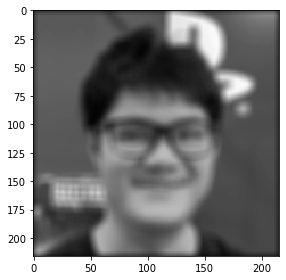

In [58]:
#平均濾波器
img = io.imread('davidFace(square).jpg')
img = img_as_float(img)

#mask:這個MASK是取平均的遮罩
mask = np.ones((9,9)) /81
result = ndi.convolve(img,mask,mode='constant')
io.imshow(result)

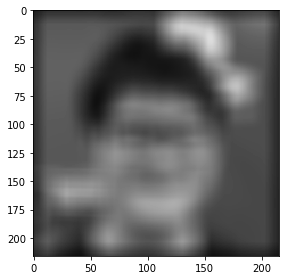

In [59]:
#內建的平均濾波器
result = ndi.uniform_filter(img,[25,25],mode='constant')
io.imshow(result)

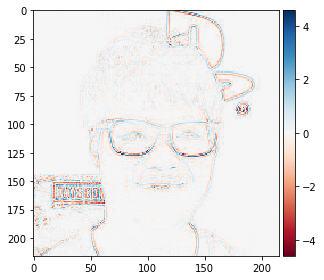

In [60]:
#Laplacian濾波器 (一種高通濾波器)
#這邊的係數是隨便給的
mask = np.array([[1,4,1],[4,-20,4],[1,4,1]])
result = ndi.convolve(img,mask)
io.imshow(result)


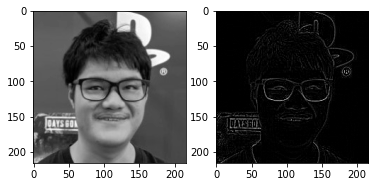

In [61]:
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

#Laplacian濾波器 (一種高通濾波器)
#利用套件去自動選擇係數 得到result
result = ndi.laplace(img)
fig = plt.figure()
result[result<0]=0
result[result>255]=255

plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(img)
ax2.imshow(result)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


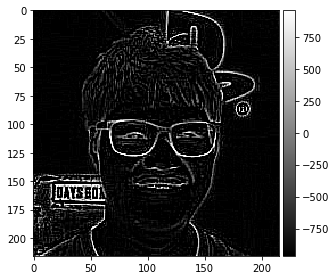

In [62]:
import cv2
import numpy as np
img2 = cv2.imread("result (Custom).jpg")
gray_lap = cv2.Laplacian(img2,cv2.CV_16S,ksize = 3)
io.imshow(gray_lap,cmap='gray')



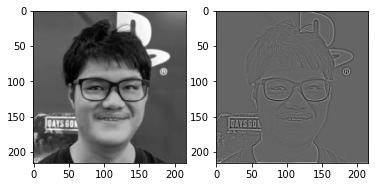

In [63]:
mask = np.array([[1,4,1],[4,-20,4],[1,4,1]])*-1
result = ndi.convolve(img,mask,mode='constant')
maxres = result.max()
minres = result.min()
#比例轉換
result = (result-minres) /(maxres-minres)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(img)
ax2.imshow(result, vmax=1.0,vmin=0.0)
plt.show()


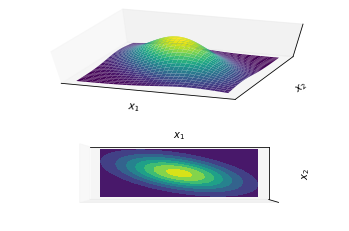

In [64]:
#製作高斯濾波器

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 100 #100點
X = np.linspace(-2, 2, N) #X方向
Y = np.linspace(-2, 2, N) #y方向
#用X和Y形成矩陣
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.]) #中心點
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]]) #高斯的SIGMA

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,)) #轉成三維
pos[:, :, 0] = X #第三維的第一數X
pos[:, :, 1] = Y #第三維的第二數Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)
# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')
ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
plt.show()


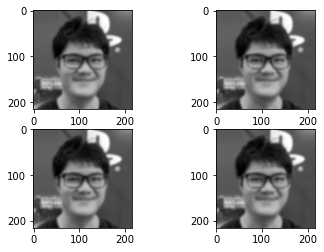

In [65]:
#利用高斯濾波器
#第二個參數是SIGMA truncate
result1 = ndi.gaussian_filter(img,2,truncate = 4)
result2 = ndi.gaussian_filter(img,2,truncate = 10)
result3 = ndi.gaussian_filter(img,2,truncate = 50)
result4 = ndi.gaussian_filter(img,2,truncate = 100)

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # left side
ax2 = fig.add_subplot(222)  # right side
ax3 = fig.add_subplot(223)  # left side
ax4 = fig.add_subplot(224)  # right side
ax1.imshow(result1)
ax2.imshow(result2)
ax3.imshow(result3)
ax4.imshow(result4)
plt.show()


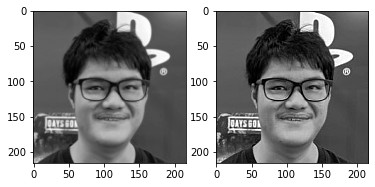

In [66]:
#邊緣銳利化
k = io.imread('result (Custom).jpg')
u = np.array([[-2.0,-2.0,-2.0],[-2.0,25.0,-2.0],[-2.0,-2.0,-2.0]]) /9
result = ndi.convolve(k.astype(float),u)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(k)
ax2.imshow(result/255,vmax=1.0,vmin=0.0)

plt.show()



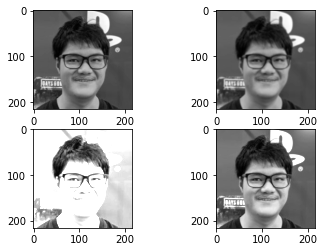

In [67]:
#高增幅濾波

#平均濾波
kf=ndi.uniform_filter(img,3)

hb1 = 3.0*k-2.0*kf
hb2 = 1.25*k-0.25*kf

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax01 = fig.add_subplot(221)  # left side
ax02 = fig.add_subplot(222)
ax1 = fig.add_subplot(223)  # left side
ax2 = fig.add_subplot(224)  # right side
ax01.imshow(img)
ax02.imshow(kf)
ax1.imshow(hb1/255,vmax=1.0,vmin=0.0)
ax2.imshow(hb2/255,vmax=1.0,vmin=0.0)

plt.show()



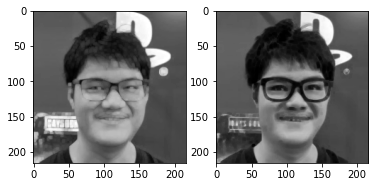

In [68]:
'''
最大濾波器
最小濾波器
都是非線性的
兩者均不是高通也不是低通
'''

#max filter
cmax=ndi.generic_filter(img,max,[3,3])
#min filter
cmin=ndi.generic_filter(img,min,[3,3])

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax01 = fig.add_subplot(121)  # left side
ax02 = fig.add_subplot(122)
ax01.imshow(cmax)
ax02.imshow(cmin)

In [82]:
import skimage.restoration as re

#denoise 去雜點
cb1 = re.denoise_bilateral(img,win_size =5,sigma_range=0.2,sigma_spatial = 2,multichannel=False)
cb2 = re.denoise_bilateral(img,win_size =7,sigma_spatial = 10,multichannel=False)
cb3 = re.denoise_bilateral(img,win_size =11,sigma_spatial = 3,multichannel=False)
cb4 = re.denoise_bilateral(img,win_size =11,sigma_spatial = 5,multichannel=False)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # left side
ax2 = fig.add_subplot(222)  # right side
ax3 = fig.add_subplot(223)  # left side
ax4 = fig.add_subplot(224)  # right side

ax1.imshow(cb1,vmax=1.0,vmin=0.0)
ax2.imshow(cb2,vmax=1.0,vmin=0.0)
ax3.imshow(cb3,vmax=1.0,vmin=0.0)
ax4.imshow(cb4,vmax=1.0,vmin=0.0)

plt.show()

TypeError: denoise_bilateral() got an unexpected keyword argument 'sigma_range'

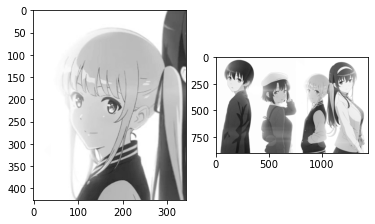

In [81]:
'''
    ROI 濾波
'''

from skimage import io
from skimage.draw import polygon
from skimage import filters
from skimage.util import img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt

l = io.imread('result2.jpg')

m= l[115:541,770:1112]
r,c = m.shape

#定義多邊形的頂點
xi = np.array([60,27,14,78,130,139])
yi= np.array([14,38,127,177,160,69])


roi = np.zeros_like(m)
r,c = polygon(yi,xi)
roi[c,r]=1

lg = img_as_ubyte(filters.gaussian(m, sigma = 0.4))
lr = lg*roi + m*(1-roi)

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ax1.imshow(lg/255,vmax=1.0,vmin=0.0)
ax2.imshow(l/255,vmax=1.0,vmin=0.0)


plt.show()
